##### Deep MF

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dot
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers import SGD

In [3]:
df = pd.read_csv('./data/very_small_rating.csv')

In [31]:
N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies
K=64
reg = 0. # regularization penalty

In [32]:
df = shuffle(df)
cutoff = int(0.8 * len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [33]:
# keras model
# note that batch size is implicit, so this means our input is batch sized by 1
# shape parameter specifies the input shape of the layer
u = Input(shape=(1,))
m = Input(shape=(1,)) 
u_embedding = Embedding(N, K,embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K,embeddings_regularizer=l2(reg))(m) # (M, 1, K)
x = Dot(axes=2)([u_embedding, m_embedding]) 
# In particular, the output of this is not batch sized by k, instead it is batch sized by 1 x k

In [18]:
x

<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'dot_1')>

In [34]:
model = Model(inputs=[u, m], outputs=x)
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

c:\Users\mrizv\anaconda3\envs\mytfenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
r=model.fit(
    x=[df_train.userId.values, df_train.movie_idx.values],
    y=df_train.rating.values,
    epochs=20, 
    batch_size=128,
    validation_data=(
        [df_test.userId.values, df_test.movie_idx.values],
        df_test.rating.values
    )
)

Epoch 1/20
6147/6147 [==============================] - 10s 2ms/step - loss: 12.0228 - val_loss: 10.5410
Epoch 2/20
6147/6147 [==============================] - 10s 2ms/step - loss: 6.0643 - val_loss: 2.1631
Epoch 3/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.3068 - val_loss: 1.0682
Epoch 4/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.0582 - val_loss: 1.0574
Epoch 5/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.0560 - val_loss: 1.0573
Epoch 6/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.0559 - val_loss: 1.0574
Epoch 7/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.0559 - val_loss: 1.0573
Epoch 8/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.0559 - val_loss: 1.0573
Epoch 9/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1.0559 - val_loss: 1.0573
Epoch 10/20
6147/6147 [==============================] - 9s 1ms/step - loss: 1

In [21]:
metric = pd.DataFrame(data=r.history)
metric



,loss,val_loss
0,12.022829,10.540986
1,6.064315,2.163069
2,1.306806,1.068166
3,1.058164,1.057397
4,1.055967,1.057324
5,1.055935,1.057438
6,1.055948,1.057256
7,1.055936,1.057252
8,1.055942,1.057331
9,1.055926,1.057214


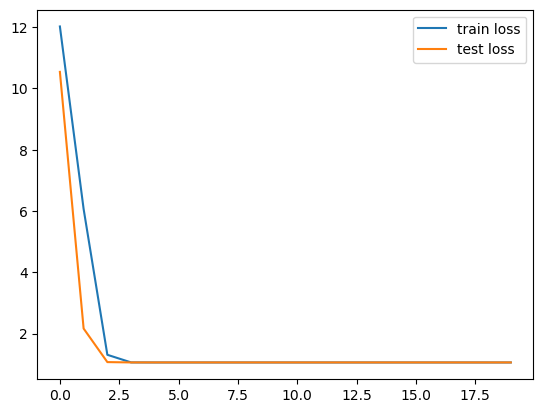

In [22]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

In [23]:
preds = model.predict([df_test.userId.values, df_test.movie_idx.values])

6147/6147 [==============================] - 5s 790us/step


In [30]:
# calculate the mse
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test.rating, preds.reshape(-1))

1.0516759172201087

#### Now using Neural Network

In [131]:
u = Input(shape=(1,))
m = Input(shape=(1,)) 
u_embedding = Embedding(N, K,embeddings_regularizer=l2(reg))(u) # (N, 1, K) N is batch size
m_embedding = Embedding(M, K,embeddings_regularizer=l2(reg))(m) # (N, 1, K)
x = Dot(axes=2)([u_embedding,m_embedding])

In [132]:
x = Flatten()(x) # (N, 1)

In [133]:
x = Dense(400)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)

In [134]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=1e-4),
)

In [135]:
r=model.fit(
    x=[df_train.userId.values, df_train.movie_idx.values],
    y=df_train.rating.values,
    epochs=20, 
    batch_size=128,
    validation_data=(
        [df_test.userId.values, df_test.movie_idx.values],
        df_test.rating.values
    )
)

Epoch 1/20
6147/6147 [==============================] - 19s 3ms/step - loss: 1.8562 - val_loss: 1.0504
Epoch 2/20
6147/6147 [==============================] - 19s 3ms/step - loss: 0.9074 - val_loss: 0.6559
Epoch 3/20
6147/6147 [==============================] - 19s 3ms/step - loss: 0.6375 - val_loss: 0.6194
Epoch 4/20
6147/6147 [==============================] - 19s 3ms/step - loss: 0.5787 - val_loss: 0.6002
Epoch 5/20
6147/6147 [==============================] - 19s 3ms/step - loss: 0.5308 - val_loss: 0.5932
Epoch 6/20
6147/6147 [==============================] - 19s 3ms/step - loss: 0.4932 - val_loss: 0.5929
Epoch 7/20
6147/6147 [==============================] - 19s 3ms/step - loss: 0.4633 - val_loss: 0.5944
Epoch 8/20
6147/6147 [==============================] - 20s 3ms/step - loss: 0.4400 - val_loss: 0.5967
Epoch 9/20
6147/6147 [==============================] - 20s 3ms/step - loss: 0.4217 - val_loss: 0.6006
Epoch 10/20
6147/6147 [==============================] - 20s 3ms/step - l

In [136]:
metric = pd.DataFrame(data=r.history)
metric

,loss,val_loss
0,1.856247,1.050417
1,0.907394,0.655908
2,0.637488,0.619438
3,0.578710,0.600212
4,0.530837,0.593153
5,0.493179,0.592925
6,0.463313,0.594449
7,0.440017,0.596719
8,0.421734,0.600569
9,0.406341,0.604862


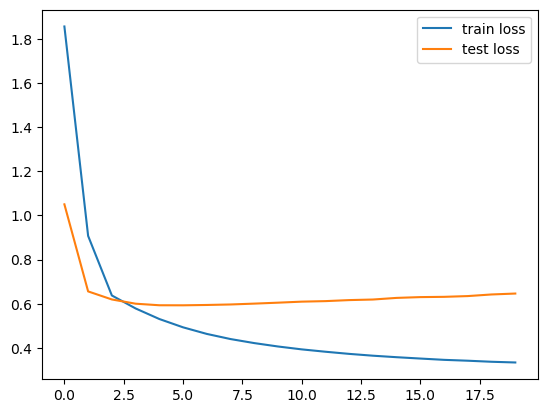

In [137]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

In [138]:
preds = model.predict([df_test.userId.values, df_test.movie_idx.values])

6147/6147 [==============================] - 6s 898us/step


In [139]:
# calculate the mse
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test.rating, preds.reshape(-1))

0.6462153482873986

In [140]:
tempUser = np.array([100]) # user 101 
tempMovie = np.array([65]) # movie 66
model.predict([tempUser, tempMovie])

1/1 [==============================] - 0s 73ms/step


array([[2.792236]], dtype=float32)